# Analysez des données de systèmes éducatifs

## 0 - Rappel du sujet

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université. 

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansio
 

Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de academy, et comment ce potentiel pourrait évol
er. 


## 1 - Analyse générale des données

Le jeu de données à analyser contient 5 fichiers :
- EdStatsCountry : ce fichier contient la liste des pays, leur zone géographique, le groupe de revenus.
- EdStatsCountry-Series : ce fichier donne des indications par pays sur la source des indicateurs, et le périmètre (exemple pour la France, les chiffres inclus la Guyane, la Guadeloupe,..). Il ne sera analysé par la suite.
- EdStatsData : il s'agit du fichier principal où se trouve les valorisations des indicateurs par pays et par année.
- EdStatsFootNote : ce fichier indique la source des données de chaque indicateur valorisé par pays. A ce stade de l'analyse, son contenu n'est pas utile pour répondre à la problématique. Il ne sera donc pas détaillé ci-dessous.
- EdStatsSeries : ce fichier contient la liste exhaustive de tous les indicateurs avec leur description.


### 1.1 - Analyse du fichier EdStatsCountry

#### 1.1.1 - Manipulation du fichier avec python et premiers constats

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [7]:
# Charger le fichier de données
countries = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsCountry.csv")
countries.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [8]:
# nombre de pays dans le dataframe
print("Il y a", countries.shape[0], "pays dans le fichier (nbre de lignes)")
print("Il y a", countries.shape[1], "colonnes")

Il y a 241 pays dans le fichier (nbre de lignes)
Il y a 32 colonnes


In [9]:
# identifier le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par colonnes")
print(countries.isnull().sum())
# constat :
## Il y a 32 colonnes, mais la plupart des colonnes contiennent des valeurs manquantes
## on peut utiliser le country code, le nom long ou court
## 27 pays sans région

Nombre de valeurs manquantes par colonnes
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                 

In [10]:
# Identifier les "pays" sans région
mask = countries['Region'].isnull()
paysSansRegion = countries.loc[mask, 'Short Name']
print(paysSansRegion)
# Constat :
## les pays sans région ne sont pas des pays, hormis Nauru (pays d'océanie - East Asia & Pacific) qu'on peut corriger manuellement par la suite, 
## mais ce n'est pas utile, car Nauru est un pays de moins de 10 000 habitants, sur une île isolée.


5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [11]:
# Identifier la liste des régions
regions = countries['Region'].unique()
print(regions)
# Constat :
## il y a 7 régions dont voici la liste
## Ces régions pourront être utilisées par la suite

['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [12]:
# rechercher les doublons
countries.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [13]:
mask1 = countries['Short Name'].duplicated(keep=False)
countries.loc[mask1,:]
# Constat :
## Pas de de doublons sur le nom court du pays

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


In [14]:
# Calculer les effectifs par groupe de revenus

effectifs_grp_revenus = countries['Income Group'].value_counts()
print("Nombre total de pays avec un groupe de revenu : ", effectifs_grp_revenus.sum())

pd.DataFrame({'Income Group':effectifs_grp_revenus.index, 'nb':effectifs_grp_revenus.values})

# Constat :
## il y a des pays qui n'ont pas de groupe de revenus. Lesquels ?
### ce ne sont pas des pays. Ce sont les mêmes que plus haut qui n'ont pas de région

Nombre total de pays avec un groupe de revenu :  214


,Income Group,nb
0,Upper middle income,55
1,Lower middle income,50
2,High income: nonOECD,44
3,Low income,34
4,High income: OECD,31


In [15]:
# Rechercher les pays sans groupe de revenus
mask = countries['Income Group'].isnull()
countries.loc[mask]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1.2 - Conclusions

On pourra constituer un dataFrame avec les colonnes suivantes de ce fichier :
    - Le short Name
    - Region
    - Income Group
Ce dataFrame permettra d'avoir une liste exhaustive des pays étudiés, de faire des regaroupements par niveau de revenus et par région.

Il faudra corriger manuellement la région et le groupe de revenus du pays Nauru.

### 1.2 - Analyse du fichier EdStatsSeries

#### 1.2.1 - Manipulation du fichier avec python et premiers constats

In [18]:
series = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsSeries.csv")
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# nombre de series dans le dataframe
print("Il y a", series.shape[0], "indicateurs / series (lignes) dans le dataframe")
print("Il y a", series.shape[1], "colonnes")

Il y a 3665 indicateurs / series (lignes) dans le dataframe
Il y a 21 colonnes


In [20]:
# identifier les outliers / valeurs extrêmes / doublons éventuels
series.describe(include="all")
# Constat :
## Le Topic semble être un regroupement d'indicateurs, comme une thématique. Il y en 37 unique
## Il n'y a pas d'indicateurs en double (count = 3665 et unique = 3665)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,14,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,9,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,3,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# identifier la liste des Topics
series['Topic'].unique()
# Constat
## on peut regrouper les indicateurs par thèmes
## on peut filtrer d'abord les Topics/Thèmes pertinents pour notre analyse avant d'aller dans le détail des indicateurs ?
## il faut vérifier si tous les indicateurs sont rattachés à un Topic

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [22]:
# Vérifier s'il y a des indicateurs sans Topic
mask = series['Topic'].isnull()
nbIndicateursSansPays = series.loc[mask, 'Indicator Name'].sum()
print("nombre d'indicateurs/series sans Topic/Thème :", nbIndicateursSansPays)
# Constat
## Tous les indicateurs sont rattachés à un thème

nombre d'indicateurs/series sans Topic/Thème : 0


In [23]:
# identifier le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par variable")
print(series.isnull().sum())
# Constat
## on ne peut pas exploiter l'unité de mesure - aucune donnée renseignée
## on peut utiliser uniquement Series Code, Topic Indicator Name, et Long definition

Nombre de valeurs manquantes par variable
Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64


#### 1.2.2 - Conclusions

Ce fichier permet simplement de connaître la liste exhaustive des indicateurs, et leur définition pour avoir plus de précisions. Etant donné qu'on verra par la suite qu'il y a très peu d'indicateurs à retenir dans notre contexte, on n'utilisera pas le Topic (regroupement par thème des indicateurs).


### 1.3 - Analyse du fichier EdStatsData

#### 1.3.1 - Manipulation du fichier avec python et premiers constats

In [26]:
data = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsData.csv")
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print("nbre de lignes : ", data.shape[0])
print("nbre de colonnes : ", data.shape[1])

nbre de lignes :  886930
nbre de colonnes :  70


In [28]:
# Rechercher s'il y a des pays dans le fichier data qui ne sont pas dans le fichier countries

mask = ~data['Country Name'].isin(countries.iloc[:, 1])
data.loc[mask, 'Country Name'].unique()

# Constat
## Il y a effectivement des pays qui ne sont pas dans le fichier 'countries', comme la Cote d'Ivoire, le Congo ou l'Iran.

array(['East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Bahamas, The', 'British Virgin Islands', 'Brunei Darussalam',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao',
       'Egypt, Arab Rep.', 'Faroe Islands', 'Gambia, The',
       'Iran, Islamic Rep.', 'Korea, Dem. People’s Rep.', 'Korea, Rep.',
       'Macedonia, FYR', 'Micronesia, Fed. Sts.', 'Russian Federation',
       'Sao Tome and Principe', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.'], dtype=object)

In [29]:
# identifier le nombre de valeurs manquantes par variable
sf = data.isnull().sum()
print(sf)
# Constat :
## Les années vont de 1970 à 2100. De 2020 à 2100 doivent être des projections
## on voit qu'il y a beaucoup de valeurs manquantes pour chaque année

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


In [30]:
# Afficher le pourcentage de valeurs manquantes par année
sf = data.isnull().sum() * 100 / data.shape[0]
print(sf.iloc[4:])
# Constat :
## on voit que 2005 et 2010 ont la meilleure couverture (79% et 72V %) 
## mais les années de projection peuvent être pertinentes

1970            91.849639
1971            95.993258
1972            95.984012
1973            95.992356
1974            95.971497
1975            90.156382
1976            95.773849
1977            95.763589
1978            95.763364
1979            95.849842
1980            89.951631
1981            95.627953
1982            95.770692
1983            95.663694
1984            95.647233
1985            89.819264
1986            95.560867
1987            95.643286
1988            95.653321
1989            95.767422
1990            85.973527
1991            91.607342
1992            91.482642
1993            91.454455
1994            91.266278
1995            85.189248
1996            91.340128
1997            91.718287
1998            90.426076
1999            86.601085
2000            80.080051
2001            86.074549
2002            85.996076
2003            85.301771
2004            85.476419
2005            79.242105
2006            84.180037
2007            84.522792
2008        

In [31]:
# Quels sont les indicateurs renseignés pour 2030 :
mask = ~data['2030'].isnull()
data.loc[mask, 'Indicator Name'].unique()

# Constat :
## on voit qu'il y des indicateurs pertinents, comme 
## Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total


array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

In [32]:
# Quelle seraient les valorisations pour cet indicateur pertinent pour 2030 :
mask = (data['Indicator Name'] == 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total') & (~data['2030'].isnull())
print("nombre de pays valorisés en 2030 pour l'indicateur 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total' : ", len(data.loc[mask, ['Country Name', 'Indicator Name', '2030']]))

nombre de pays valorisés en 2030 pour l'indicateur 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total' :  167


In [33]:
# Quelle seraient les valorisations pour cet indicateur pertinent pour 2040 :
mask = (data['Indicator Name'] == 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total') & (~data['2040'].isnull())
print("nombre de pays valorisés en pour l'indicateur 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total' : ", len(data.loc[mask, ['Country Name', 'Indicator Name', '2040']]))

nombre de pays valorisés en pour l'indicateur 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total' :  167


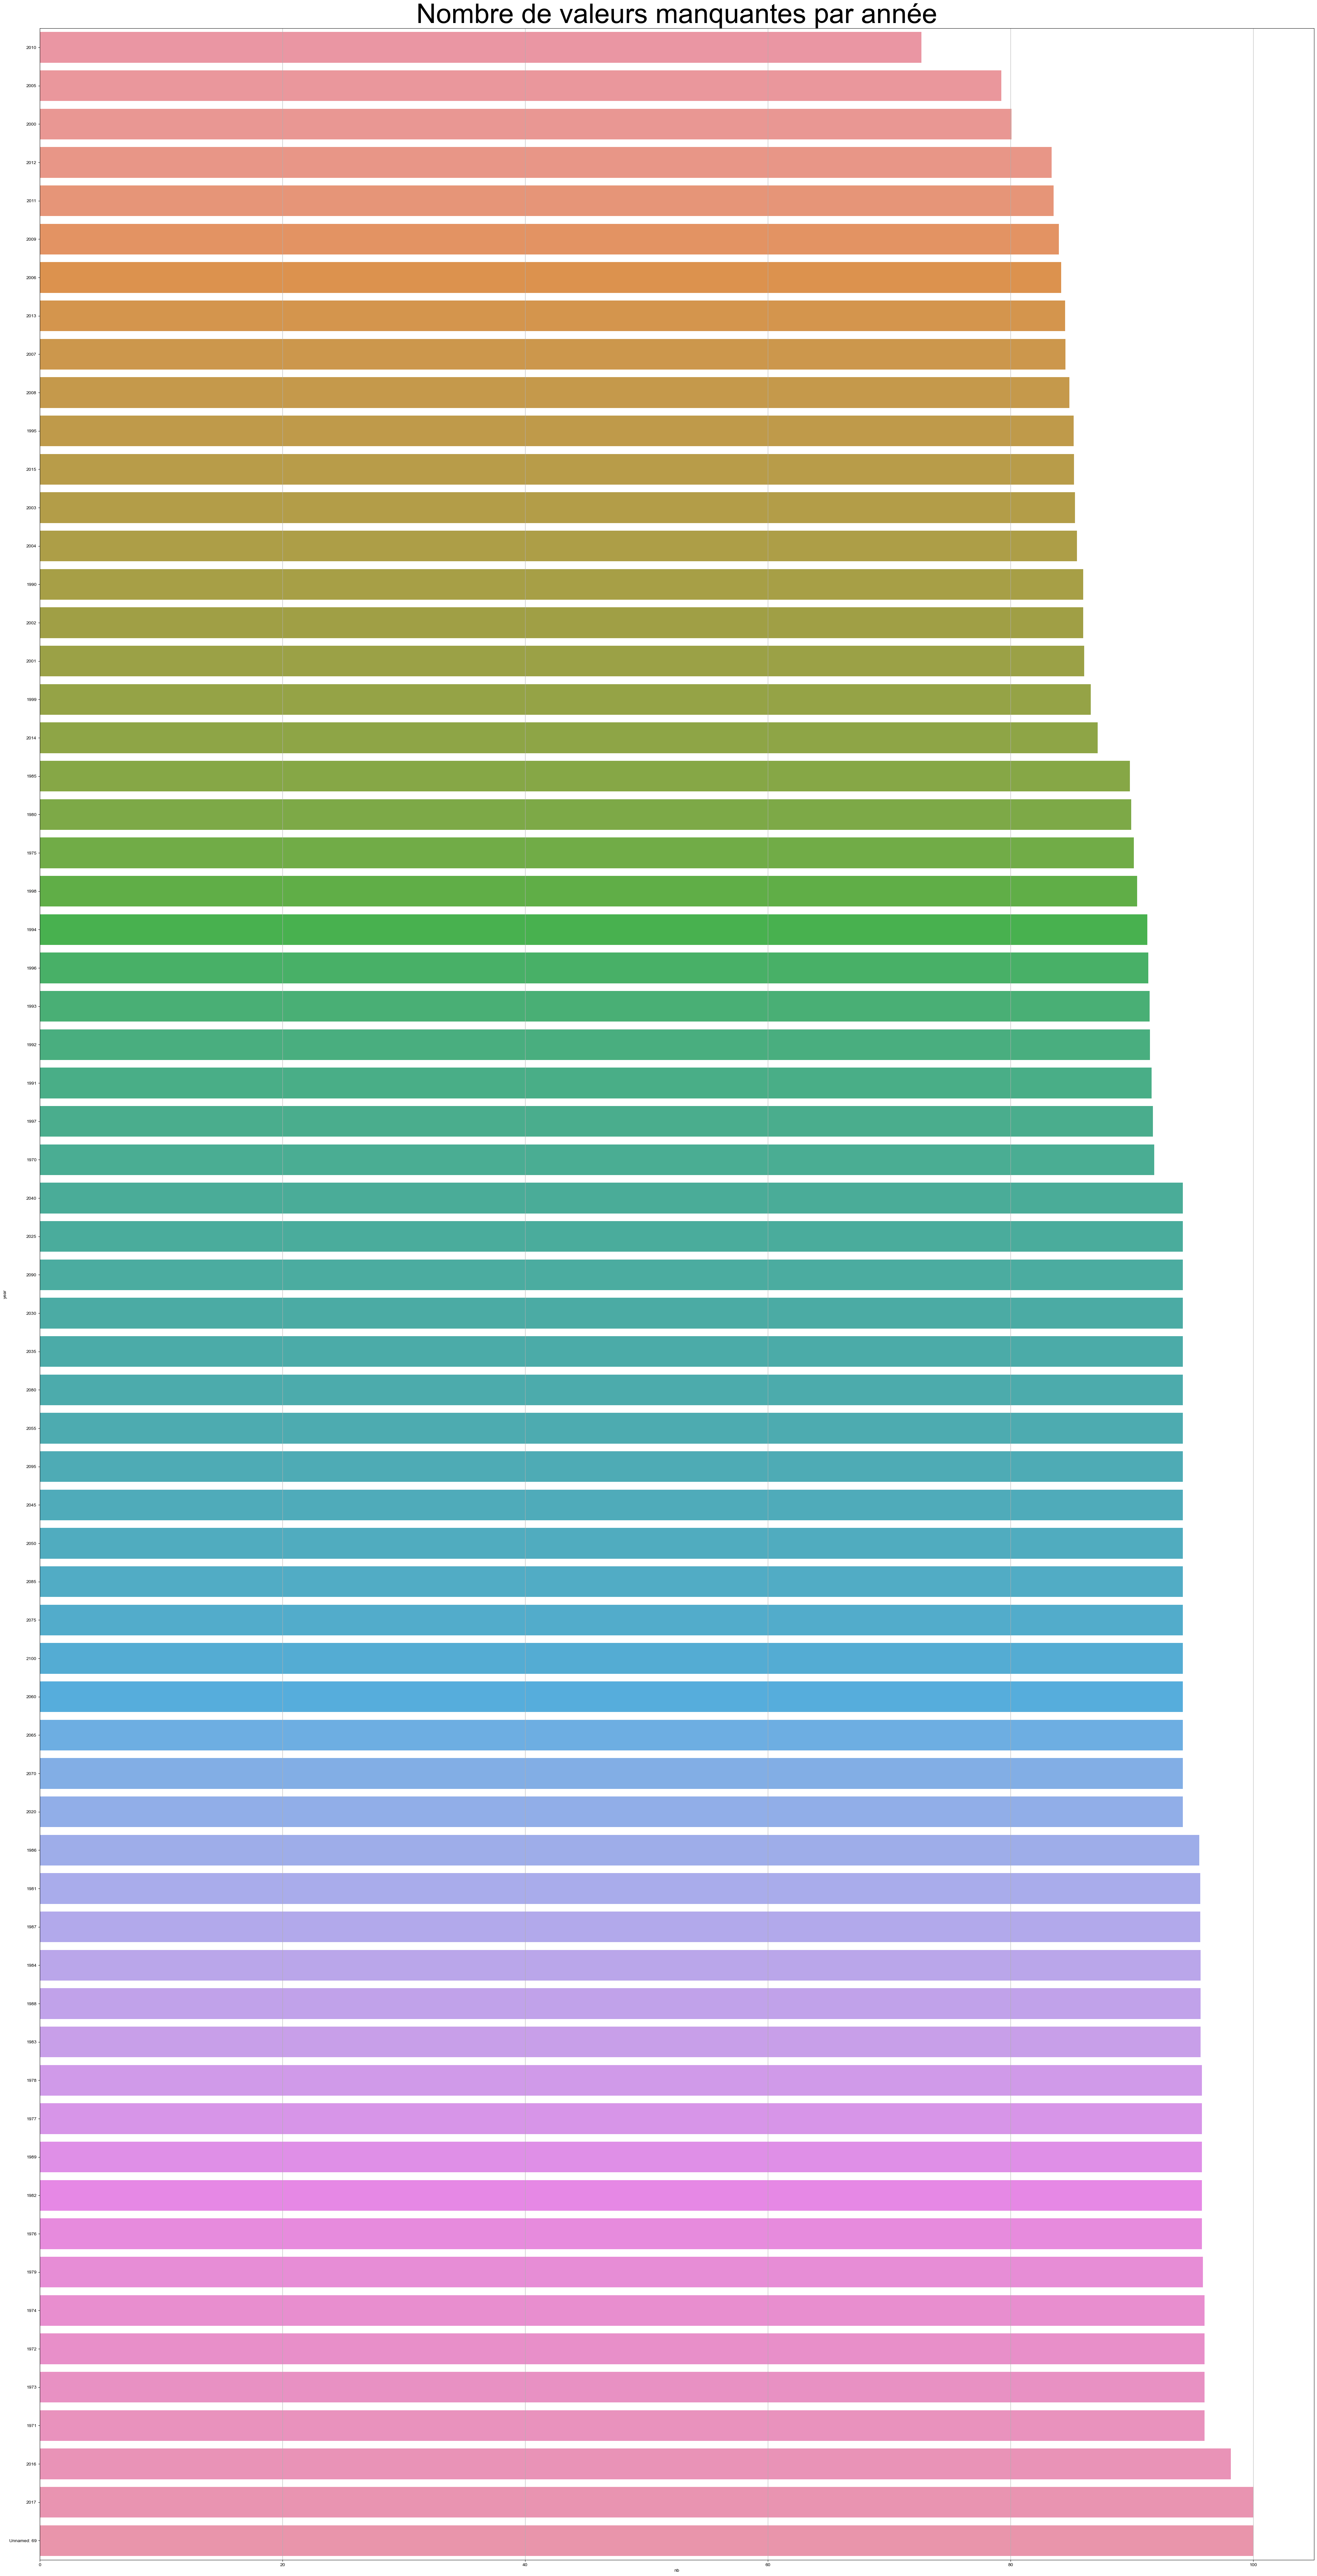

In [34]:
# Rechercher les années les mieux valorisées tout indicateur confondu

data_years_count = pd.DataFrame({'year':sf.index, 'nb':sf.values})
data_years_count_tri = data_years_count.sort_values(['nb'], ascending=[True])
data_years_count_tri.head()

plt.figure(figsize=(50,100))
sns.barplot(data=data_years_count_tri.iloc[4:70,:], y='year', x='nb', errorbar=None)
sns.set_palette('pastel')
sns.set(font_scale=5)

plt.title("Nombre de valeurs manquantes par année")
plt.ylabel("year")
plt.xlabel("nb")
#plt.xlim(0,100)
#plt.xticks([0, 25, 50, 75, 100])
plt.grid(axis="x")

plt.show()

# Constat
# 2005 et 2010 sont les mieux valorisées

In [35]:
# rechercher les doublons country_name / indicator_name
doublons = data.duplicated(subset = ['Country Name', 'Indicator Name'])
totalDoublons = 0
for doublon in doublons:
    if doublon == True:
        totalDoublons += 1
print('fin, total doublons = ', totalDoublons)        
# Constat
## pas de doublons pays / indicateur

fin, total doublons =  0


Identifier la ou les années à prendre en compte dans l'analyse

In [37]:
# Calculer le nombre de valeurs de chaque indicateur par année, tout pays confondus

data_by_indicators_count = data.groupby('Indicator Name').count().reset_index()
data_by_indicators_count

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,4,29,29,25,29,22,27,31,31,32,25,30,24,24,27,25,29,25,18,24,21,26,30,32,39,33,32,29,42,96,95,101,101,94,101,105,98,104,102,112,106,107,102,99,85,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,25,22,24,20,22,27,26,26,21,27,24,24,25,24,26,21,15,22,17,23,25,27,33,28,27,28,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adjusted net enrolment rate, primary, both sex...",242,242,242,15,15,17,18,19,21,22,22,22,22,22,22,22,22,22,23,24,24,24,24,24,24,25,25,25,25,25,25,25,145,148,141,149,148,147,157,150,157,157,163,156,157,161,152,155,119,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,"Youth illiterate population, 15-24 years, male...",242,242,242,3,0,0,0,0,5,8,1,2,7,19,18,7,2,4,15,14,13,14,21,27,33,19,14,22,17,20,15,17,19,55,40,30,22,30,33,39,47,44,45,60,70,54,42,49,31,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3661,"Youth literacy rate, population 15-24 years, b...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,19,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3662,"Youth literacy rate, population 15-24 years, f...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,18,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3663,"Youth literacy rate, population 15-24 years, g...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,18,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# On peut aussi retirer les indicateurs qui distinguent les 'female' et les 'males' 
# pour se concentrer sur la population totale, quelque soit le sexe

mask = ~(data_by_indicators_count['Indicator Name'].str.contains('female') | data_by_indicators_count['Indicator Name'].str.contains('male'))
data_by_indicators_count_without_sex = data_by_indicators_count.loc[mask]

print("Nombre d'indicateurs sans female ou male : ", data_by_indicators_count_without_sex.shape[0])

data_by_indicators_count_without_sex.head()

Nombre d'indicateurs sans female ou male :  2458


,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,4,29,29,25,29,22,27,31,31,32,25,30,24,24,27,25,29,25,18,24,21,26,30,32,39,33,32,29,42,96,95,101,101,94,101,105,98,104,102,112,106,107,102,99,85,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adjusted net enrolment rate, primary, both sex...",242,242,242,15,15,17,18,19,21,22,22,22,22,22,22,22,22,22,23,24,24,24,24,24,24,25,25,25,25,25,25,25,145,148,141,149,148,147,157,150,157,157,163,156,157,161,152,155,119,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Adjusted net enrolment rate, primary, gender p...",242,242,242,26,55,59,61,58,56,58,61,72,70,61,79,79,81,77,75,85,77,77,75,74,71,76,76,85,81,84,78,79,131,128,118,119,125,126,135,136,142,142,144,135,140,141,130,120,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Adjusted net enrolment rate, upper secondary, ...",242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,24,33,25,32,33,39,37,40,42,46,56,57,57,53,100,90,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Si on prend 2010 comme année de repère car c'est celle qui est la plus valorisée
# Quelles seraient les indicateurs les mieux valorisés pour 2010 ?
# pd.set_option('display.max_rows', 10)

mask = ~data_by_indicators_count_without_sex['2010'].isnull()
data_by_indicators_count_without_sex_sort = data_by_indicators_count_without_sex.loc[mask, ['Indicator Name', '2010']].sort_values('2010', ascending = False)
display(data_by_indicators_count_without_sex_sort)

# J'ai ensuite balayé visuellement la liste triée pour sélectionner des indicateurs pertinents pour notre analyse

,Indicator Name,2010
2533,"Population, total",240
2307,Population growth (annual %),240
1245,GDP per capita (current US$),228
1243,GDP at market prices (current US$),228
1242,GDP at market prices (constant 2005 US$),227
...,...,...
2040,PISA: Male 15-year-olds by mathematics profici...,0
2039,PISA: Male 15-year-olds by mathematics profici...,0
2038,PISA: Male 15-year-olds by mathematics profici...,0
2037,PISA: Male 15-year-olds by mathematics profici...,0


#### 1.3.2 - Conclusions

Les années retenues sont 2005 et 2010 car se sont celles les mieux valorisées pour tous les indicateurs, et particulièrement ceux sélectionnés. Ainsi que 2014 qui est l'année la plus récente la mieux valorisée.
Les années de projection/futures sont faiblement valorisés, mais pour ces 2 indicateurs, nous avons 167 pays valorisés :
- Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
- Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
Mais on pourra tout de même utiliser ces 2 indicateurs pour la projection dans le futur 2030 et 2040.

Par ailleurs, pour compenser le déficit de pays dans les années de projection, on peut s'appuyer sur l'indicateur autour de l'éducation primaire , qui permettra d'estimer le nombre d'élèves futur dans le secondaire et à l'université.

Liste des indicateurs dans le fichier data retenus sont :

- GDP per capita (current US$)
- Internet users (per 100 people)
--> moyens dont disposent les élèves pour étudier en ligne

- Population of the official age for primary education, both sexes (number) 
- Population of the official age for secondary education, both sexes (number)
- Population of the official age for tertiary education, both sexes (number)
--> permet de voir l'évolutivité de la jeune population scolarisée dans le temps, et à comparer avec l'évolution de la population totale

- Population, total

- Population growth (annual %)
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- Gross outbound enrolment ratio, all regions, both sexes (%)

- Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
--> le dernier uniquement pour les projections dans le futur : 2030 et 2040

## 2 - Sélectionner les données pertinentes

### 2.1 - DataFrame country_selected

In [44]:
# On crée un dataframe sans les pays sans région vus précédemment, avec les 2 colonnes qui nous intéressent
mask = ~countries['Region'].isnull()
countries_selected = countries.loc[mask, ['Short Name', 'Region']].reset_index()
countries_selected = countries_selected.rename(columns={'Short Name': 'Country Name'})
print("Il y a", countries_selected.shape[0], "pays dans le dataFrame")
countries_selected.head()

Il y a 214 pays dans le dataFrame


,index,Country Name,Region
0,0,Aruba,Latin America & Caribbean
1,1,Afghanistan,South Asia
2,2,Angola,Sub-Saharan Africa
3,3,Albania,Europe & Central Asia
4,4,Andorra,Europe & Central Asia


### 2.2 - DataFrame data_selected

In [46]:
# on crée une liste avec tous indicateurs retenus, sauf les projections dans le futur
list_selected = [
    "GDP per capita (current US$)",
    "Internet users (per 100 people)",
    "Population, total",
    "Population of the official age for primary education, both sexes (number)",
    "Population of the official age for secondary education, both sexes (number)",
    "Population of the official age for tertiary education, both sexes (number)",
    "Population growth (annual %)",
    "Unemployment, total (% of total labor force)",
    "Gross outbound enrolment ratio, all regions, both sexes (%)"
]

In [47]:
# on crée un échantillon de "data" avec uniquement les indicateurs de la liste ci-dessus, et les années 2005 et 2010
mask_data_selected = data['Indicator Name'].isin(list_selected)
data_selected = data.loc[mask_data_selected, ['Country Name', 'Indicator Name', '2005', '2010', '2014']].reset_index()
data_selected.shape[0]

2178

In [48]:
# on retire de ce dataframe les 27 "pays" qui n'en sont pas
mask = ~data_selected['Country Name'].isin(paysSansRegion)
data_selected = data_selected.loc[mask]
print("Il y a donc", len(data_selected['Country Name'].unique()), "pays représentés dans ce fichier")
print("Ces pays ont", data_selected.shape[0] / len(data_selected['Country Name'].unique()), "indicateurs chacun")

Il y a donc 225 pays représentés dans ce fichier
Ces pays ont 9.0 indicateurs chacun


### 2.3 - Dataframe echantillon_projection

In [50]:
# on crée une liste avec les indicateurs futurs retenus
list_future = [
    "Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total"
]

In [51]:
# on crée un échantillon de "data" avec uniquement les indicateurs de la liste ci-dessus, et les années 2030 et 2040
mask_data_future = data['Indicator Name'].isin(list_future)
data_future = data.loc[mask_data_future, ['Country Name', 'Indicator Name', '2030', '2040']].reset_index()
data_future.shape[0]

242

In [52]:
# retirer les pays dont les valeurs sont manquantes
data_future = data_future.dropna(subset=['2030', '2040'])
print('nombre de pays valorisés dans le dataframe futur : ', data_future.shape[0])

# Constat
## on retrouve bien les 167 pays valorisés

nombre de pays valorisés dans le dataframe futur :  167


In [53]:
# on retire dans ce dataframe les 27 "pays" qui n'en sont pas
mask = ~data_future['Country Name'].isin(paysSansRegion)
data_future = data_future.loc[mask]
print("Il y a donc", len(data_future['Country Name'].unique()), "pays représentés dans ce dataframe futur")
print("Ces pays ont", data_future.shape[0] / len(data_future['Country Name'].unique()), "indicateurs chacun")

Il y a donc 166 pays représentés dans ce dataframe futur
Ces pays ont 1.0 indicateurs chacun


In [54]:
# créer le dataframe avec les indicateurs en colonnes à partir du dataframe data_future
# pivot the dataframe
pivot_data_future = data_future.pivot_table(index='Country Name', columns='Indicator Name').reset_index()
pivot_data_future.head()

,Country Name,2030,2040,index
Indicator Name,,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
0,Albania,13.94,15.34,98904.0
1,Algeria,1044.45,1269.20,102569.0
2,Argentina,247.98,276.84,120894.0
3,Armenia,38.39,34.76,124559.0
4,Aruba,0.77,0.90,128224.0


In [55]:
pivot_data_future.describe()

# Constat
## on voit qu'il y a des pays qui ont 0.00000 personnes entre 20 et 24 ans. Quels sont ces pays ?

,2030,2040,index
Indicator Name,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
count,166.000000,166.000000,166.00000
mean,608.992349,683.898976,494591.53012
std,2386.292419,2601.390365,226619.02294
min,0.000000,0.000000,98904.00000
25%,14.085000,16.697500,301395.25000
50%,68.950000,86.510000,492891.50000
75%,283.192500,324.792500,684387.75000
max,22443.920000,22836.480000,886879.00000


In [56]:
# rechercher les pays avec 0.000000 population entre 20 et 24 ans
mask = pivot_data_future[('2030','Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total')] == 0
pivot_data_future.loc[mask, 'Country Name']

26    Central African Republic
Name: Country Name, dtype: object

In [57]:
# On supprime ce pays du dataframe car il ne peut pas être utilisé, d'autant plus que c'est un pays à faible revenu, 
# donc pas une destination à privilégier pour un développement international
pivot_data_future.drop(pivot_data_future[pivot_data_future[('2030','Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total')] == 00].index, inplace=True)
pivot_data_future.describe()

,2030,2040,index
Indicator Name,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
count,165.000000,165.000000,165.00000
mean,612.683212,688.043818,496190.00000
std,2393.081338,2608.759517,226368.27329
min,0.030000,0.030000,98904.00000
25%,14.520000,16.750000,304144.00000
50%,69.000000,88.660000,494724.00000
75%,291.850000,326.130000,685304.00000
max,22443.920000,22836.480000,886879.00000


In [58]:
# Pour plus de clarté, nous appelerons ce dataframe 'echantillon_projection'
echantillon_projection = pivot_data_future
echantillon_projection.describe()

,2030,2040,index
Indicator Name,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total
count,165.000000,165.000000,165.00000
mean,612.683212,688.043818,496190.00000
std,2393.081338,2608.759517,226368.27329
min,0.030000,0.030000,98904.00000
25%,14.520000,16.750000,304144.00000
50%,69.000000,88.660000,494724.00000
75%,291.850000,326.130000,685304.00000
max,22443.920000,22836.480000,886879.00000


# 3 - Créer un dataframe pluriannuel dans le but de mener une analyse

## 3.1 - Créer le dataframe principal à analyser à partir de data_selected

In [61]:
# Tester le pivot_table sur un exemple, pour s'assurer que les valeurs seront bien toutes reportées
exemple = {'Indicateur': ['ind1', 'ind1', 'ind2', 'ind2'],
        'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
        '2005': [1, 2, 11, 22],
        '2010': [101, 102, 103, 104]}

df = pd.DataFrame(exemple)

print('Original DataFrame')
print(df)
print()

# pivot the dataframe
pivot_df = df.pivot_table(index='City', columns='Indicateur').reset_index()

print('Reshaped DataFrame')
print(pivot_df)

print()
print("Dataframe réduit avec que l'année 2010")
print(pivot_df['2010'])

Original DataFrame
  Indicateur         City  2005  2010
0       ind1     New York     1   101
1       ind1  Los Angeles     2   102
2       ind2     New York    11   103
3       ind2  Los Angeles    22   104

Reshaped DataFrame
                   City 2005         2010       
Indicateur              ind1  ind2   ind1   ind2
0           Los Angeles  2.0  22.0  102.0  104.0
1              New York  1.0  11.0  101.0  103.0

Dataframe réduit avec que l'année 2010
Indicateur   ind1   ind2
0           102.0  104.0
1           101.0  103.0


Le pivot_table est validé

In [63]:
# Ajouter la zone géographique dans data_selected
echantillon = pd.merge(data_selected, countries_selected, on='Country Name', how='left')
echantillon = echantillon.drop(columns=['index_y'])
echantillon = echantillon.drop(columns=['index_x'])
#echantillon = echantillon.rename(columns={'index_x': 'index'})
echantillon.reset_index()
echantillon.head()

,Country Name,Indicator Name,2005,2010,2014,Region
0,East Asia & Pacific,GDP per capita (current US$),4.842265e+03,7.679834e+03,9.665056e+03,NaN
1,East Asia & Pacific,"Gross outbound enrolment ratio, all regions, b...",4.397100e-01,5.142800e-01,NaN,NaN
2,East Asia & Pacific,Internet users (per 100 people),1.466636e+01,3.423084e+01,4.681210e+01,NaN
3,East Asia & Pacific,Population growth (annual %),7.560929e-01,6.757239e-01,6.818708e-01,NaN
4,East Asia & Pacific,Population of the official age for primary edu...,1.918516e+08,1.697305e+08,1.711129e+08,NaN


In [64]:
# Rechercher les pays sans région
mask = echantillon['Region'].isna()
echantillon.loc[mask, 'Country Name'].unique()

array(['East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Bahamas, The', 'British Virgin Islands', 'Brunei Darussalam',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao',
       'Egypt, Arab Rep.', 'Faroe Islands', 'Gambia, The',
       'Iran, Islamic Rep.', 'Korea, Dem. People’s Rep.', 'Korea, Rep.',
       'Macedonia, FYR', 'Micronesia, Fed. Sts.', 'Russian Federation',
       'Sao Tome and Principe', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.'], dtype=object)

In [65]:
# Supprimer les pays qui ne sont pas des pays
list = ['East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)']
mask = ~echantillon['Country Name'].isin(list)
echantillon = echantillon[mask]
echantillon.head()

,Country Name,Indicator Name,2005,2010,2014,Region
90,Afghanistan,GDP per capita (current US$),2.502941e+02,5.533003e+02,6.120697e+02,South Asia
91,Afghanistan,"Gross outbound enrolment ratio, all regions, b...",1.558300e-01,3.136900e-01,NaN,South Asia
92,Afghanistan,Internet users (per 100 people),1.224148e+00,4.000000e+00,7.000000e+00,South Asia
93,Afghanistan,Population growth (annual %),3.870470e+00,2.812617e+00,3.183201e+00,South Asia
94,Afghanistan,Population of the official age for primary edu...,4.145879e+06,5.003108e+06,5.564280e+06,South Asia


In [66]:
# Renseignons la region des pays dont la région n'est pas valorisée
mask = echantillon['Country Name'] == "Bahamas, The"
echantillon.loc[mask, 'Region'] = 'Latin America & Caribbean'

mask = echantillon['Country Name'] == "British Virgin Islands"
echantillon.loc[mask, 'Region'] = 'North America'

mask = echantillon['Country Name'] == "Brunei Darussalam"
echantillon.loc[mask, 'Region'] = 'East Asia & Pacific'

mask = echantillon['Country Name'] == "Congo, Dem. Rep."
echantillon.loc[mask, 'Region'] = 'Sub-Saharan Africa'

mask = echantillon['Country Name'] == "Congo, Rep."
echantillon.loc[mask, 'Region'] = 'Sub-Saharan Africa'

mask = echantillon['Country Name'] == "Cote d'Ivoire"
echantillon.loc[mask, 'Region'] = 'Sub-Saharan Africa'

mask = echantillon['Country Name'] == "Curacao"
echantillon.loc[mask, 'Region'] = 'Latin America & Caribbean'

mask = echantillon['Country Name'] == "Egypt, Arab Rep."
echantillon.loc[mask, 'Region'] = 'Middle East & North Africa'

mask = echantillon['Country Name'] == "Faroe Islands"
echantillon.loc[mask, 'Region'] = 'Europe & Central Asia'

mask = echantillon['Country Name'] == "Gambia, The"
echantillon.loc[mask, 'Region'] = 'Sub-Saharan Africa'

mask = echantillon['Country Name'] == "Iran, Islamic Rep."
echantillon.loc[mask, 'Region'] = 'Middle East & North Africa'

mask = echantillon['Country Name'] == "Korea, Dem. People’s Rep."
echantillon.loc[mask, 'Region'] = 'East Asia & Pacific'

mask = echantillon['Country Name'] == "Korea, Rep."
echantillon.loc[mask, 'Region'] = 'East Asia & Pacific'

mask = echantillon['Country Name'] == "Macedonia, FYR"
echantillon.loc[mask, 'Region'] = 'Europe & Central Asia'

mask = echantillon['Country Name'] == "Micronesia, Fed. Sts."
echantillon.loc[mask, 'Region'] = 'East Asia & Pacific'

mask = echantillon['Country Name'] == "Russian Federation"
echantillon.loc[mask, 'Region'] = 'Europe & Central Asia'

mask = echantillon['Country Name'] == "Sao Tome and Principe"
echantillon.loc[mask, 'Region'] = 'Sub-Saharan Africa'

mask = echantillon['Country Name'] == "Venezuela, RB"
echantillon.loc[mask, 'Region'] = 'Latin America & Caribbeanc'

mask = echantillon['Country Name'] == "Virgin Islands (U.S.)"
echantillon.loc[mask, 'Region'] = 'Latin America & Caribbean'

mask = echantillon['Country Name'] == "Yemen, Rep."
echantillon.loc[mask, 'Region'] = 'Middle East & North Africa'


In [185]:
# créer le dataframe avec les indicateurs en colonnes à partir du dataframe echantillon
# pivot the dataframe

# réorganiser les colonnes en une seule année
echantillon_melted = echantillon.melt(id_vars=['Country Name', 'Indicator Name', 'Region'],
                    var_name='Year', value_name='Value')

# pivot pour mettre les années en lignes et les indicateurs en colonnes
echantillon_pivoted = echantillon_melted.pivot_table(index=['Country Name', 'Region', 'Year'], 
                                   columns='Indicator Name', 
                                   values='Value', 
                                   aggfunc='first').reset_index()

echantillon_pivoted.head()

Indicator Name,Country Name,Region,Year,GDP per capita (current US$),"Gross outbound enrolment ratio, all regions, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for primary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population, total","Unemployment, total (% of total labor force)"
0,Afghanistan,South Asia,2005,250.294130,0.15583,1.224148,3.870470,4145879.0,3292878.0,2304393.0,25070798.0,8.5
1,Afghanistan,South Asia,2010,553.300289,0.31369,4.000000,2.812617,5003108.0,3839021.0,2490352.0,28803167.0,8.1
2,Afghanistan,South Asia,2014,612.069651,NaN,7.000000,3.183201,5564280.0,4676453.0,3034517.0,32758020.0,8.6
3,Albania,Europe & Central Asia,2005,2709.142931,5.90823,6.043891,-0.511790,234522.0,529872.0,271360.0,3011487.0,13.8
4,Albania,Europe & Central Asia,2010,4094.358832,8.48007,45.000000,-0.496462,227021.0,402516.0,274639.0,2913021.0,14.2


ATTENTION : 
- on remarque que l'indicateur "Personal computers (per 100 people)" n'apparait plus en 2010 et 2014, car les il n'y a aucune valorisation.
- on remarque que l'indicateur "Gross outbound enrolment ratio, all regions, both sexes (%)" n'apparait plus en 2014 car il n'y a plus de valorisations à partir de 1011.


## 3.2 - Nettoyage du dataframe principal créé - valeurs manquantes

In [187]:
# identifier le nombre de valeurs manquantes par indicateur
print("Nombre de valeurs manquantes par colonnes")
print(echantillon_pivoted.isnull().sum())

Nombre de valeurs manquantes par colonnes
Indicator Name
Country Name                                                                     0
Region                                                                           0
Year                                                                             0
GDP per capita (current US$)                                                    39
Gross outbound enrolment ratio, all regions, both sexes (%)                    274
Internet users (per 100 people)                                                 44
Population growth (annual %)                                                     6
Population of the official age for primary education, both sexes (number)       73
Population of the official age for secondary education, both sexes (number)     62
Population of the official age for tertiary education, both sexes (number)      65
Population, total                                                                6
Unemployment, total (% of tota

### 3.2.1 - Nettoyage pour l'indicateur "Internet users (per 100 people)"
Etant donné le contexte du projet, l'absence de valorisation sur le thème 'Internet users' est éliminatoire, car les futurs clients de l'Academy à l'international doivent pouvoir accéder au réseau pour suivre les cours en ligne

In [189]:
# supprimer les pays pour lesquels la variable 'Internet users' n'est pas valorisée

# rechercher les pays concernés
mask = echantillon_pivoted['Internet users (per 100 people)'].isnull()
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur Internet Users n'est pas valorisé :", liste_pays)

# supprimer ces pays du dataframe principal
# etape 2 - supprimer ces pays du dataframe principal
mask = ~echantillon_pivoted['Country Name'].isin(liste_pays)
echantillon_pivoted = echantillon_pivoted.loc[mask]

Liste des pays dont l'indicateur Internet Users n'est pas valorisé : ['American Samoa' 'Belarus' 'British Virgin Islands' 'Channel Islands'
 'Curacao' 'Eritrea' 'Guyana' 'Isle of Man' 'Korea, Dem. People’s Rep.'
 'Kosovo' 'Liberia' 'Mongolia' 'Northern Mariana Islands' 'Palau'
 'San Marino' 'Sint Maarten (Dutch part)' 'Somalia' 'South Sudan'
 'St. Martin (French part)' 'Turks and Caicos Islands' 'Tuvalu']


In [191]:
# identifier le nombre de valeurs manquantes par indicateur
print("Nombre de valeurs manquantes par colonnes")
print(echantillon_pivoted.isnull().sum())

Nombre de valeurs manquantes par colonnes
Indicator Name
Country Name                                                                     0
Region                                                                           0
Year                                                                             0
GDP per capita (current US$)                                                    16
Gross outbound enrolment ratio, all regions, both sexes (%)                    231
Internet users (per 100 people)                                                  0
Population growth (annual %)                                                     0
Population of the official age for primary education, both sexes (number)       47
Population of the official age for secondary education, both sexes (number)     37
Population of the official age for tertiary education, both sexes (number)      42
Population, total                                                                0
Unemployment, total (% of tota

### 3.2.2 - Nettoyage pour l'indicateur "GDP per capita (current US$)"
Le GDP (PIB) en dollars est aussi une donnée importante, car elle permet d'en déduire le niveau de vie des habitants, et donc les moyens que les habitants de ces pays disposent pour des cours en ligne.

In [211]:
# recherche les pays pour lesquels la variable 'GDP per capita (current US$)' n'est pas valorisée

mask = echantillon_pivoted['GDP per capita (current US$)'].isnull() & (echantillon_pivoted['Year'] == '2005')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2005 :", liste_pays)

mask = echantillon_pivoted['GDP per capita (current US$)'].isnull() & (echantillon_pivoted['Year'] == '2010')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2010 :", liste_pays)

mask = echantillon_pivoted['GDP per capita (current US$)'].isnull() & (echantillon_pivoted['Year'] == '2014')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2014 :", liste_pays)

mask = (echantillon_pivoted['Year'] == '2005') & (echantillon_pivoted['Country Name'] == 'Puerto Rico') 
print(echantillon_pivoted.loc[mask, 'GDP per capita (current US$)'])

Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2005 : ['Cayman Islands' 'French Polynesia' 'New Caledonia']
Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2010 : ['Cayman Islands' 'French Polynesia' 'New Caledonia'
 'Syrian Arab Republic']
Liste des pays dont l'indicateur 'GDP per capita (current US$)' n'est pas valorisé pour 2014 : ['Aruba' 'Bermuda' 'Cayman Islands' 'French Polynesia' 'Libya' 'Monaco'
 'New Caledonia' 'Puerto Rico' 'Syrian Arab Republic']
465    21959.322708
Name: GDP per capita (current US$), dtype: float64


On peut récupérer sur internet les valeurs pour Monaco :
- 2014 : 168 K USD

Pour Puerto Rico :
- 2014 : 29 K USD

In [221]:
# On renseigne ces valeurs manuellement pour 2014
mask = (echantillon_pivoted['Country Name'] == 'Monaco') & (echantillon_pivoted['Year'] == '2014')
echantillon_pivoted.loc[mask, 'GDP per capita (current US$)'] = 168000.000000

mask = (echantillon_pivoted['Country Name'] == 'Puerto Rico') & (echantillon_pivoted['Year'] == '2014')
echantillon_pivoted.loc[mask, 'GDP per capita (current US$)'] = 29000.000000

# et on supprime les autres
mask = ~echantillon_pivoted['GDP per capita (current US$)'].isnull()
echantillon_pivoted = echantillon_pivoted.loc[mask]

In [223]:
# identifier le nombre de valeurs manquantes par indicateur
print("Nombre de valeurs manquantes par colonnes")
print(echantillon_pivoted.isnull().sum())

Nombre de valeurs manquantes par colonnes
Indicator Name
Country Name                                                                     0
Region                                                                           0
Year                                                                             0
GDP per capita (current US$)                                                     0
Gross outbound enrolment ratio, all regions, both sexes (%)                    218
Internet users (per 100 people)                                                  0
Population growth (annual %)                                                     0
Population of the official age for primary education, both sexes (number)       38
Population of the official age for secondary education, both sexes (number)     28
Population of the official age for tertiary education, both sexes (number)      33
Population, total                                                                0
Unemployment, total (% of tota

### 3.3.3 - Nettoyage pour l'indicateur "Unemployment, total (% of total labor force)"

In [230]:
# Rechercher les pays concernés pour les 3 années
mask = echantillon_pivoted['Unemployment, total (% of total labor force)'].isnull() & (echantillon_pivoted['Year'] == '2005')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2005 :", liste_pays)

mask = echantillon_pivoted['Unemployment, total (% of total labor force)'].isnull() & (echantillon_pivoted['Year'] == '2010')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2010 :", liste_pays)

mask = echantillon_pivoted['Unemployment, total (% of total labor force)'].isnull() & (echantillon_pivoted['Year'] == '2014')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2014 :", liste_pays)

Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2005 : ['Andorra' 'Antigua and Barbuda' 'Aruba' 'Bermuda' 'Dominica'
 'Faroe Islands' 'Greenland' 'Grenada' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Micronesia, Fed. Sts.' 'Monaco' 'Seychelles'
 'St. Kitts and Nevis']
Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2010 : ['Andorra' 'Antigua and Barbuda' 'Aruba' 'Bermuda' 'Dominica'
 'Faroe Islands' 'Greenland' 'Grenada' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Micronesia, Fed. Sts.' 'Monaco' 'Seychelles'
 'St. Kitts and Nevis']
Liste des pays dont l'indicateur 'Unemployment, total (% of total labor force)' n'est pas valorisé pour 2014 : ['Andorra' 'Antigua and Barbuda' 'Dominica' 'Faroe Islands' 'Greenland'
 'Grenada' 'Kiribati' 'Liechtenstein' 'Marshall Islands'
 'Micronesia, Fed. Sts.' 'Monaco' 'Seychelles' 'St. Kitts and Nevis']


Tout ces pays sont de très petites tailles. Certains ont un niveau de vie élevé, mais par exemple les taux de chomage d'Andorre, de Monaco et du Liechtenstein ne semblent pas disponibles sur Internet. Je pense qu'on peut retirer ces pays de notre dataframe principal car un déploiement dans ces pays serait peut rentable, compte tenu du nbre d'habitants. D'autant que Monaco peut être couvert par une offre en France, et Andorre par une offre en Espagne par exemple.

In [235]:
# Supprimer ces pays
mask = ~echantillon_pivoted['Unemployment, total (% of total labor force)'].isnull()
echantillon_pivoted = echantillon_pivoted.loc[mask]

In [237]:
# identifier le nombre de valeurs manquantes par indicateur
print("Nombre de valeurs manquantes par colonnes")
print(echantillon_pivoted.isnull().sum())

Nombre de valeurs manquantes par colonnes
Indicator Name
Country Name                                                                     0
Region                                                                           0
Year                                                                             0
GDP per capita (current US$)                                                     0
Gross outbound enrolment ratio, all regions, both sexes (%)                    194
Internet users (per 100 people)                                                  0
Population growth (annual %)                                                     0
Population of the official age for primary education, both sexes (number)       25
Population of the official age for secondary education, both sexes (number)     15
Population of the official age for tertiary education, both sexes (number)      20
Population, total                                                                0
Unemployment, total (% of tota

### 3.3.4 - Nettoyage de l'indicateur "Population of the official age for primary education, both sexes (number)"

In [242]:
# Rechercher les pays concernés pour les 3 années
mask = echantillon_pivoted['Population of the official age for primary education, both sexes (number)'].isnull() & (echantillon_pivoted['Year'] == '2005')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2005 :", liste_pays)

mask = echantillon_pivoted['Population of the official age for primary education, both sexes (number)'].isnull() & (echantillon_pivoted['Year'] == '2010')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2010 :", liste_pays)

mask = echantillon_pivoted['Population of the official age for primary education, both sexes (number)'].isnull() & (echantillon_pivoted['Year'] == '2014')
liste_pays = echantillon_pivoted.loc[mask, 'Country Name'].unique()
print("Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2014 :", liste_pays)

Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2005 : ['Bosnia and Herzegovina' 'Guam' 'Hong Kong SAR, China' 'Jamaica'
 'Singapore' 'Virgin Islands (U.S.)']
Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2010 : ['Armenia' 'Bosnia and Herzegovina' 'Brazil' 'Guam' 'Hong Kong SAR, China'
 'Jamaica' 'Maldives' 'Singapore' 'St. Lucia' 'Virgin Islands (U.S.)']
Liste des pays dont l'indicateur 'Population of the official age for primary education, both sexes (number)' n'est pas valorisé pour 2014 : ['Armenia' 'Bosnia and Herzegovina' 'Guam' 'Hong Kong SAR, China'
 'Jamaica' 'Maldives' 'Singapore' 'St. Lucia' 'Virgin Islands (U.S.)']


Comme les données de ces pays ne semblent pas accessibles pour les années sélectionnées, je dois les supprimer du dataframe principal


In [250]:
# Supprimer ces pays du dataframe principal
mask = ~echantillon_pivoted['Population of the official age for primary education, both sexes (number)'].isnull()
echantillon_pivoted = echantillon_pivoted.loc[mask]

In [252]:
# identifier le nombre de valeurs manquantes par indicateur
print("Nombre de valeurs manquantes par colonnes")
print(echantillon_pivoted.isnull().sum())

Nombre de valeurs manquantes par colonnes
Indicator Name
Country Name                                                                     0
Region                                                                           0
Year                                                                             0
GDP per capita (current US$)                                                     0
Gross outbound enrolment ratio, all regions, both sexes (%)                    176
Internet users (per 100 people)                                                  0
Population growth (annual %)                                                     0
Population of the official age for primary education, both sexes (number)        0
Population of the official age for secondary education, both sexes (number)      0
Population of the official age for tertiary education, both sexes (number)       7
Population, total                                                                0
Unemployment, total (% of tota

Il n'est pas nécessaire de nettoyer ici, car l'indicateur "Gross outbound enrolment ratio, all regions, both sexes (%)" sera utilisée en fn d'analyse, sur les pays les plus pertinents pour les départager si besoin.

## 3.3 - Recherche des outliers, valeurs aberrantes, erreurs de formatage, sur le dataframe principal

In [256]:
echantillon_pivoted.describe()

Indicator Name,GDP per capita (current US$),"Gross outbound enrolment ratio, all regions, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for primary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population, total","Unemployment, total (% of total labor force)"
count,500.000000,324.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,4.930000e+02,5.000000e+02,500.000000
mean,12691.158559,2.373785,31.707604,1.581085,3.938881e+06,4.531837e+06,3.543977e+06,4.025112e+07,9.019000
std,18654.245068,4.119283,28.452068,1.550216,1.283434e+07,1.662478e+07,1.290252e+07,1.436617e+08,6.397148
min,150.507043,0.051740,0.065239,-2.096943,1.282300e+04,9.879000e+03,9.769000e+03,1.010410e+05,0.100000
25%,1219.428348,0.380145,6.400000,0.548763,2.457152e+05,2.829805e+05,2.435670e+05,2.993877e+06,4.800000
50%,4187.760263,1.055135,22.035000,1.397819,8.334540e+05,9.075460e+05,7.295030e+05,9.162334e+06,7.300000
75%,15777.733974,2.796058,53.672500,2.463953,3.233121e+06,3.442386e+06,2.607408e+06,2.837842e+07,11.400000
max,119225.380023,40.556911,98.160000,13.076039,1.276937e+08,1.742689e+08,1.296427e+08,1.364270e+09,37.299999


A première vue il ne semble pas y avoir d'outliers ou de valeurs aberranntes. L'analyse nous permettra de le vérifier.

### 3.3.1 - Vérification des types de données


In [279]:
print('Type pour "GDP per capita (current US$)" : ', echantillon_pivoted['GDP per capita (current US$)'].dtype)
print('Type pour "Gross outbound enrolment ratio, all regions, both sexes (%)" : ', echantillon_pivoted['Gross outbound enrolment ratio, all regions, both sexes (%)'].dtype)
print('Type pour "Internet users (per 100 people)" : ', echantillon_pivoted['Internet users (per 100 people)'].dtype)
print('Type pour "Population growth (annual %)" : ', echantillon_pivoted['Population growth (annual %)'].dtype)
print('Type pour "Population of the official age for primary education, both sexes (number)" : ', echantillon_pivoted['Population of the official age for primary education, both sexes (number)'].dtype)
print('Type pour "Population of the official age for secondary education, both sexes (number)" : ', echantillon_pivoted['Population of the official age for secondary education, both sexes (number)'].dtype)
print('Type pour "Population of the official age for tertiary education, both sexes (number)" : ', echantillon_pivoted['Population of the official age for tertiary education, both sexes (number)'].dtype)
print('Type pour "Population, total" : ', echantillon_pivoted['Population, total'].dtype)
print('Unemployment, total (% of total labor force)" : ', echantillon_pivoted['Unemployment, total (% of total labor force)'].dtype)

Type pour "GDP per capita (current US$)" :  float64
Type pour "Gross outbound enrolment ratio, all regions, both sexes (%)" :  float64
Type pour "Internet users (per 100 people)" :  float64
Type pour "Population growth (annual %)" :  float64
Type pour "Population of the official age for primary education, both sexes (number)" :  float64
Type pour "Population of the official age for secondary education, both sexes (number)" :  float64
Type pour "Population of the official age for tertiary education, both sexes (number)" :  float64
Type pour "Population, total" :  float64
Unemployment, total (% of total labor force)" :  float64


Format des données OK

Les 2 dataframes sont désormais prêts pour l'analyse
- echantillon_pivoted
- echantillon_projection

# 4 - Analyser le jeu de données

## 4.1 - Représentation de la dispertion des indicateurs

In [285]:
echantillon_pivoted.head()

Indicator Name,Country Name,Region,Year,GDP per capita (current US$),"Gross outbound enrolment ratio, all regions, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for primary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population, total","Unemployment, total (% of total labor force)"
0,Afghanistan,South Asia,2005,250.294130,0.15583,1.224148,3.870470,4145879.0,3292878.0,2304393.0,25070798.0,8.5
1,Afghanistan,South Asia,2010,553.300289,0.31369,4.000000,2.812617,5003108.0,3839021.0,2490352.0,28803167.0,8.1
2,Afghanistan,South Asia,2014,612.069651,NaN,7.000000,3.183201,5564280.0,4676453.0,3034517.0,32758020.0,8.6
3,Albania,Europe & Central Asia,2005,2709.142931,5.90823,6.043891,-0.511790,234522.0,529872.0,271360.0,3011487.0,13.8
4,Albania,Europe & Central Asia,2010,4094.358832,8.48007,45.000000,-0.496462,227021.0,402516.0,274639.0,2913021.0,14.2


In [287]:
# créer une liste avec les indicateurs du dataframe
list = [
    "GDP per capita (current US$)",
    "Internet users (per 100 people)",
    "Population, total",
    "Population of the official age for primary education, both sexes (number)",
    "Population of the official age for secondary education, both sexes (number)",
    "Population of the official age for tertiary education, both sexes (number)",
    "Population growth (annual %)",
    "Unemployment, total (% of total labor force)",
    "Gross outbound enrolment ratio, all regions, both sexes (%)"
]

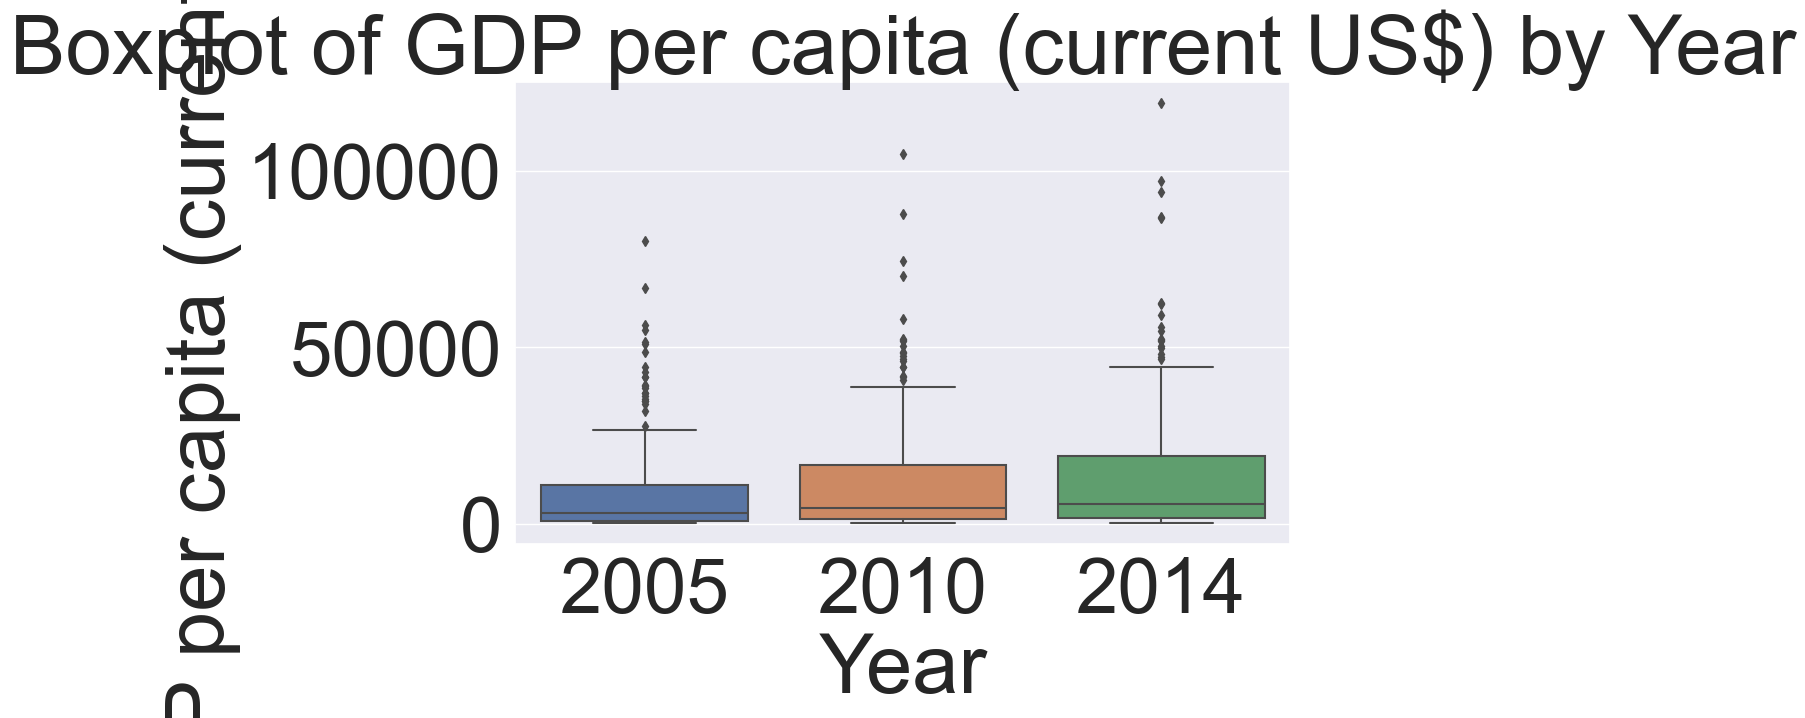

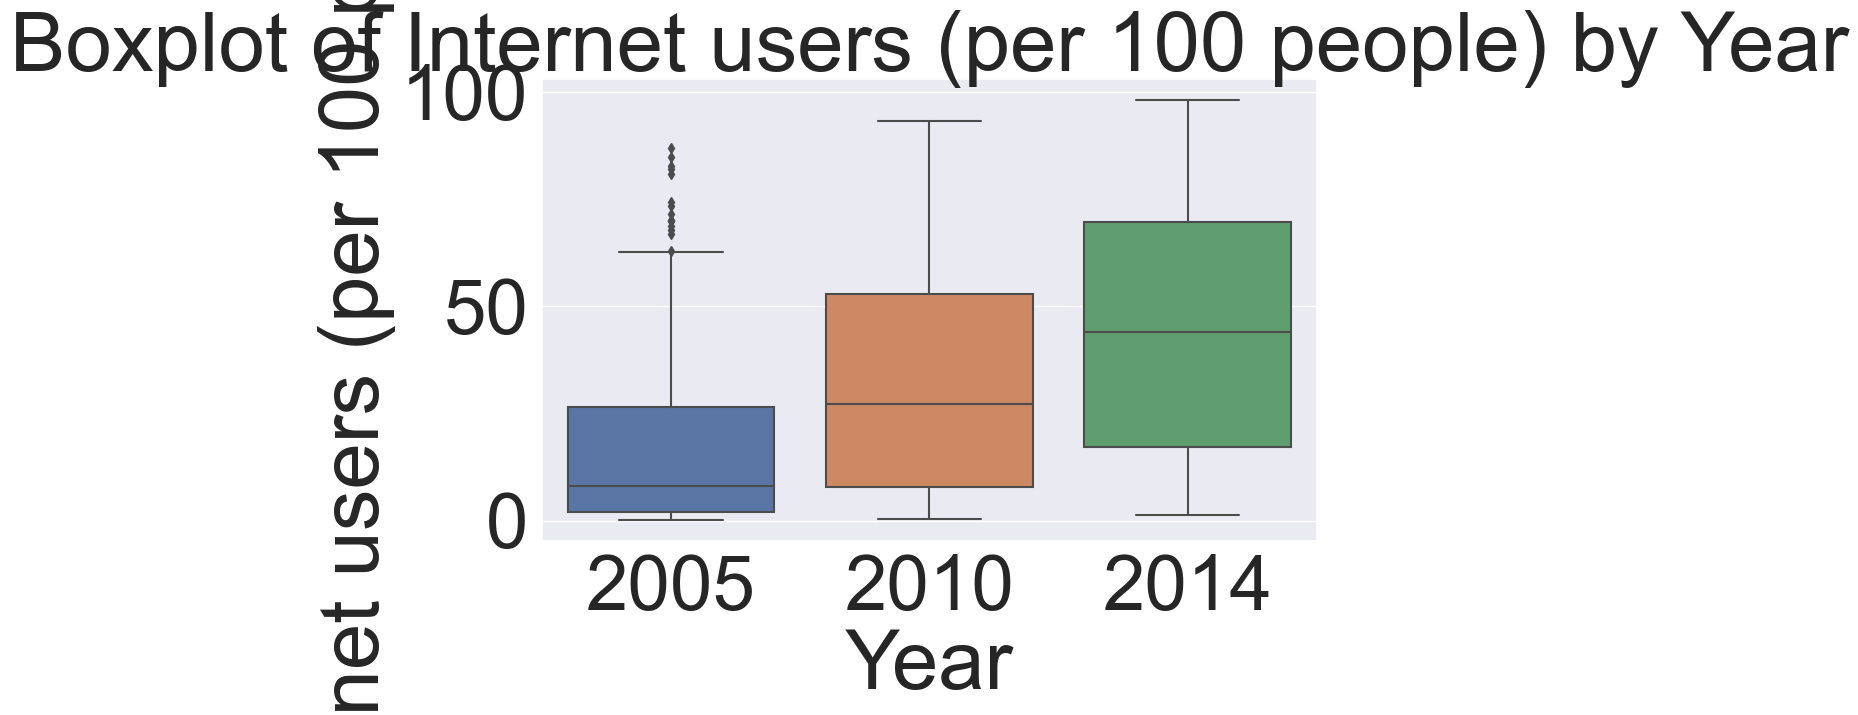

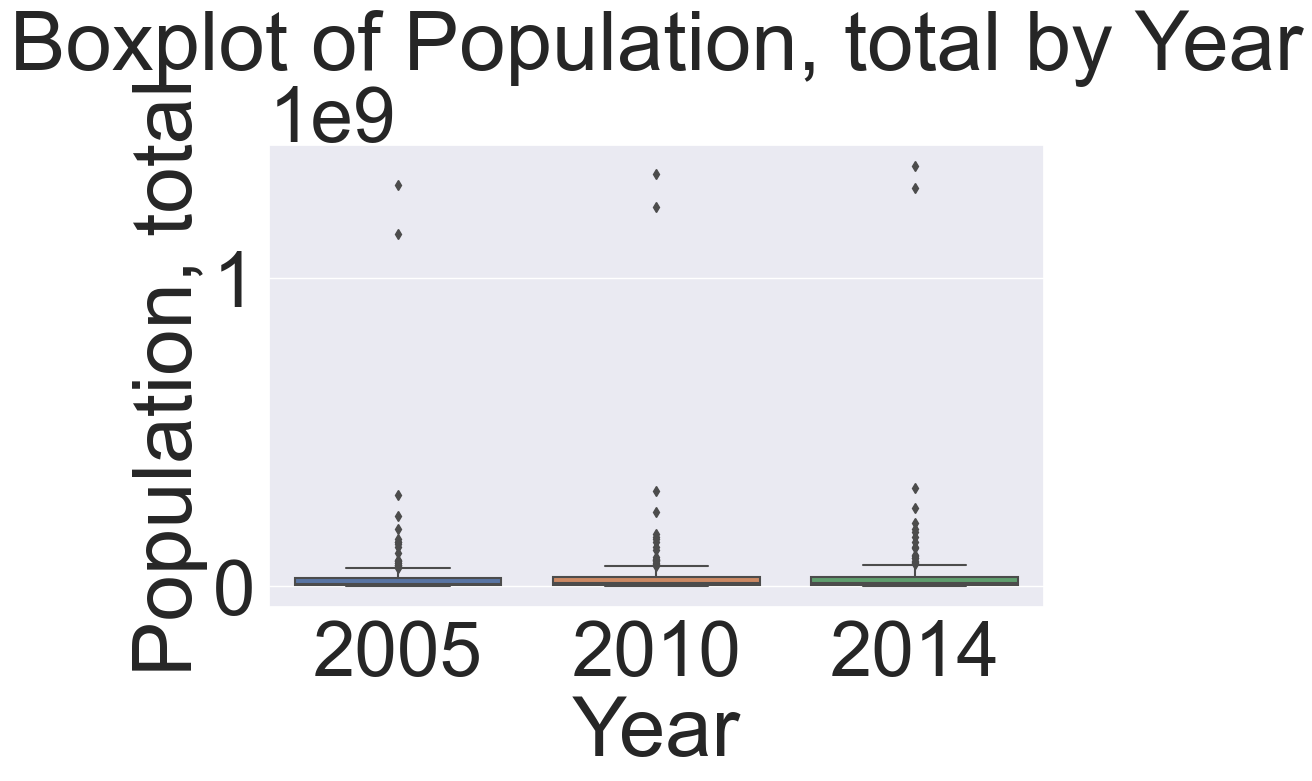

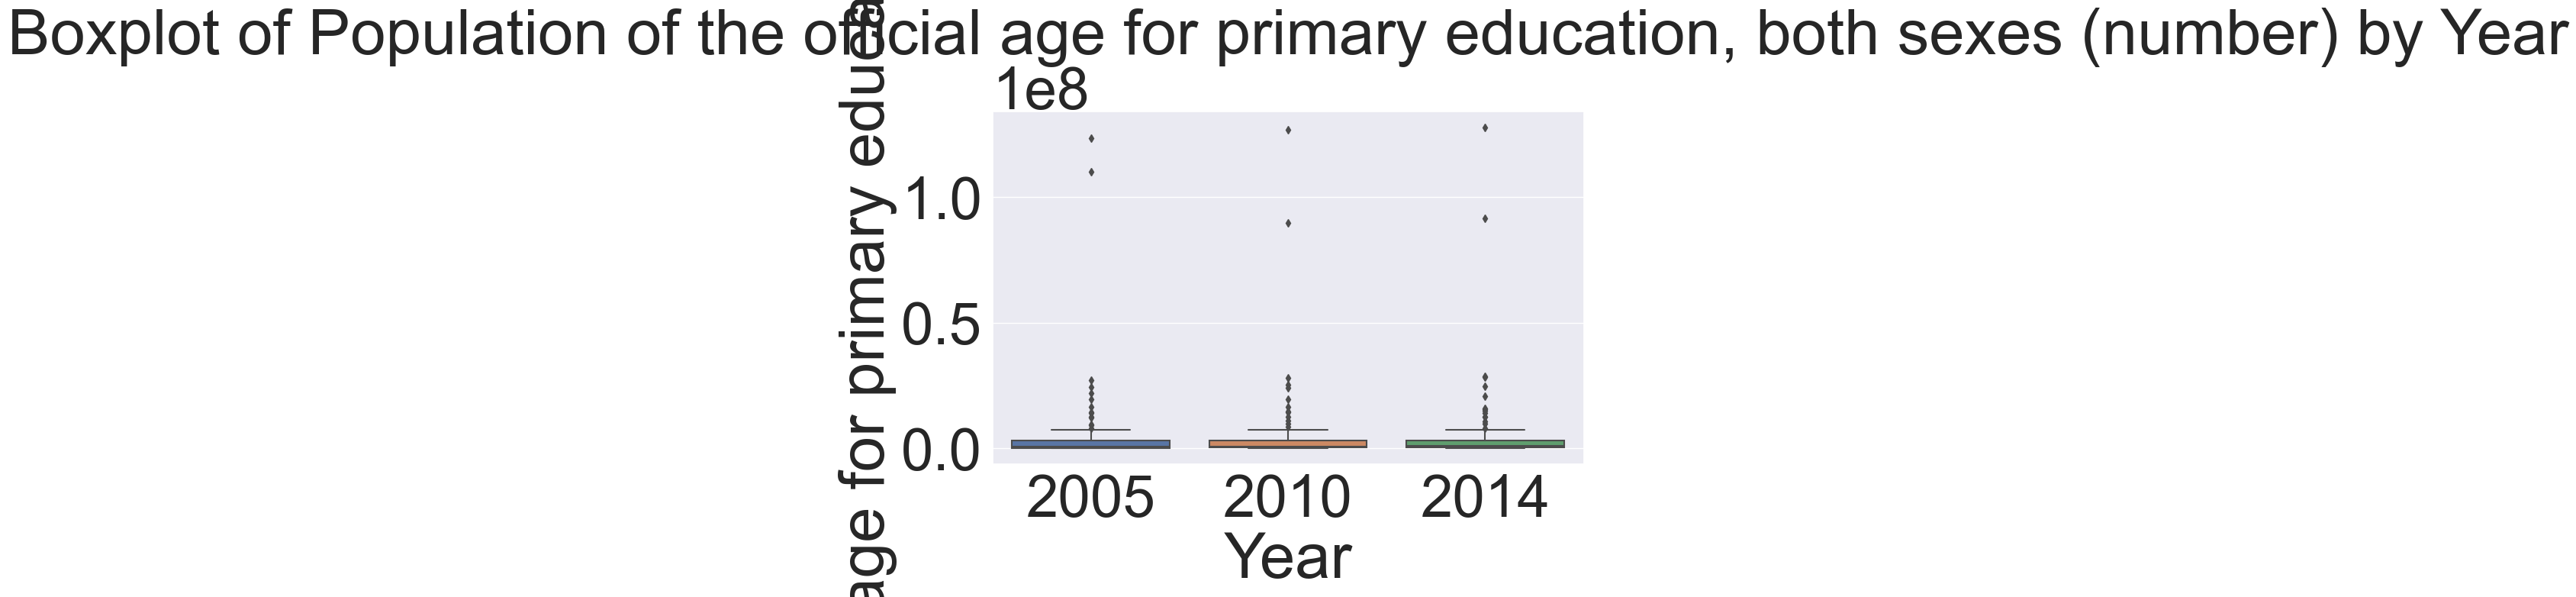

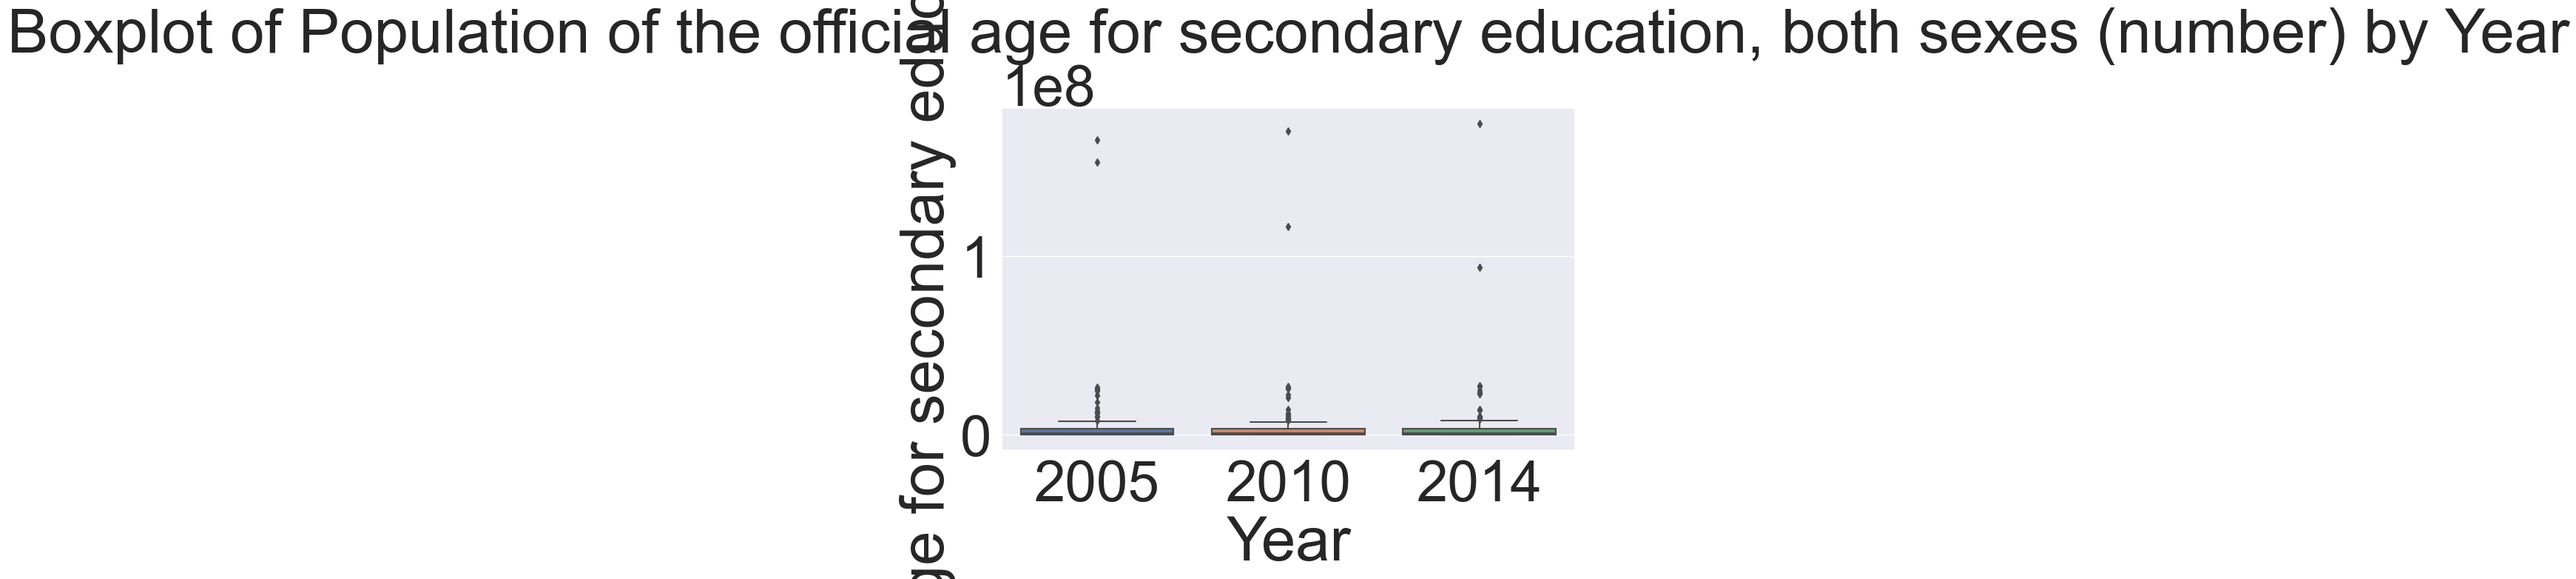

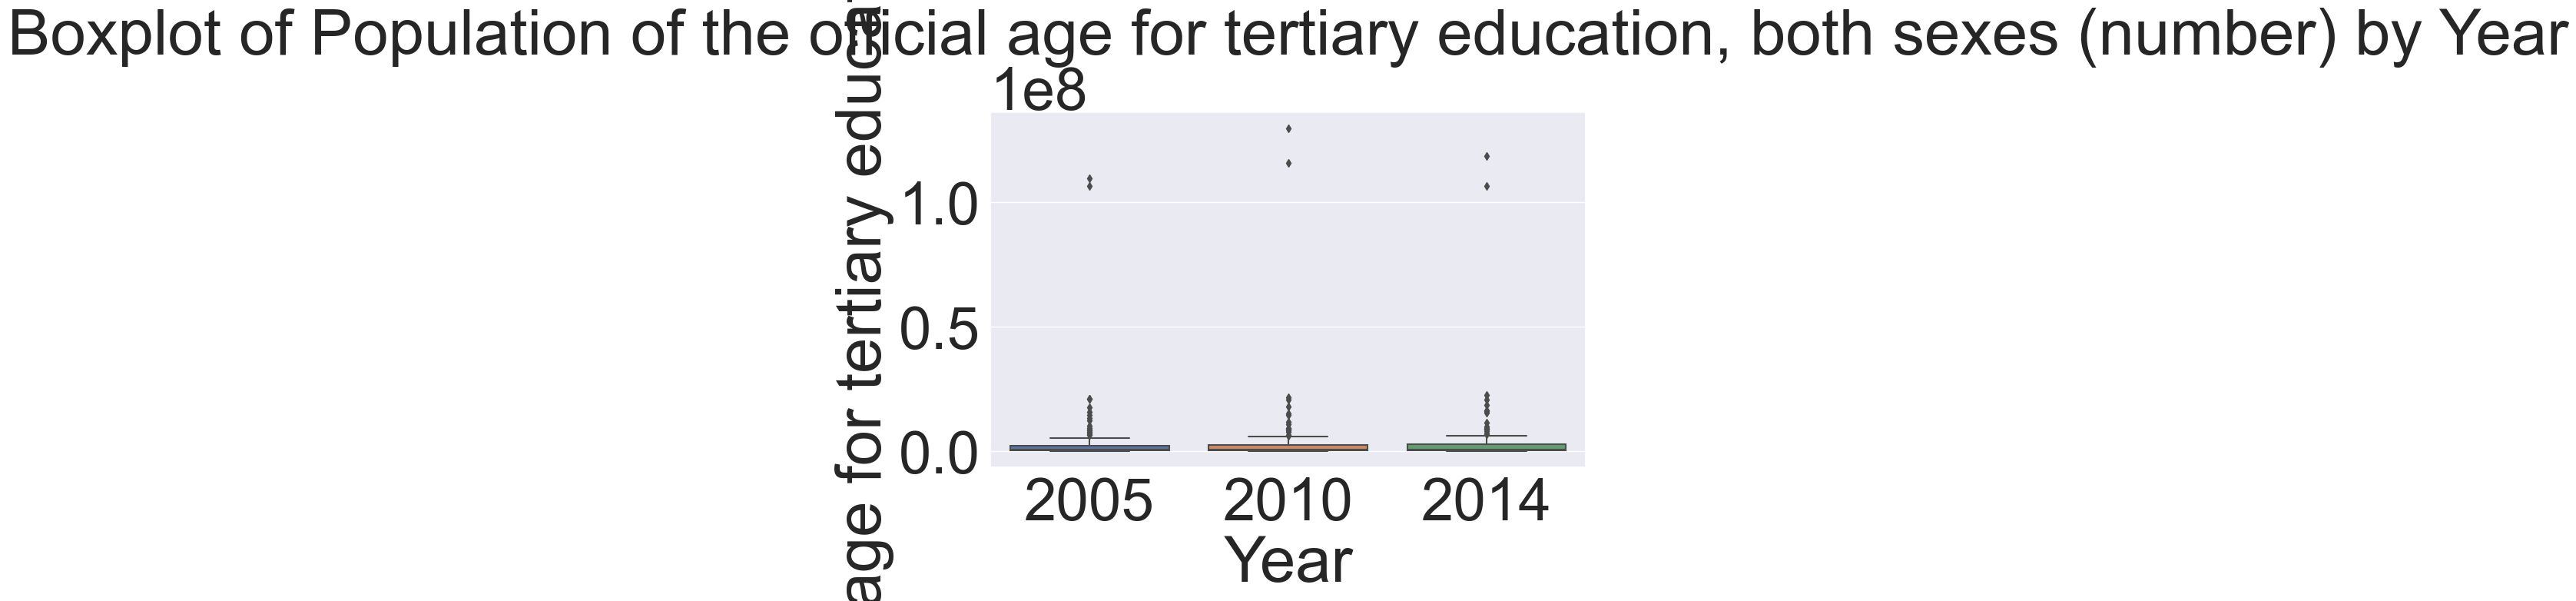

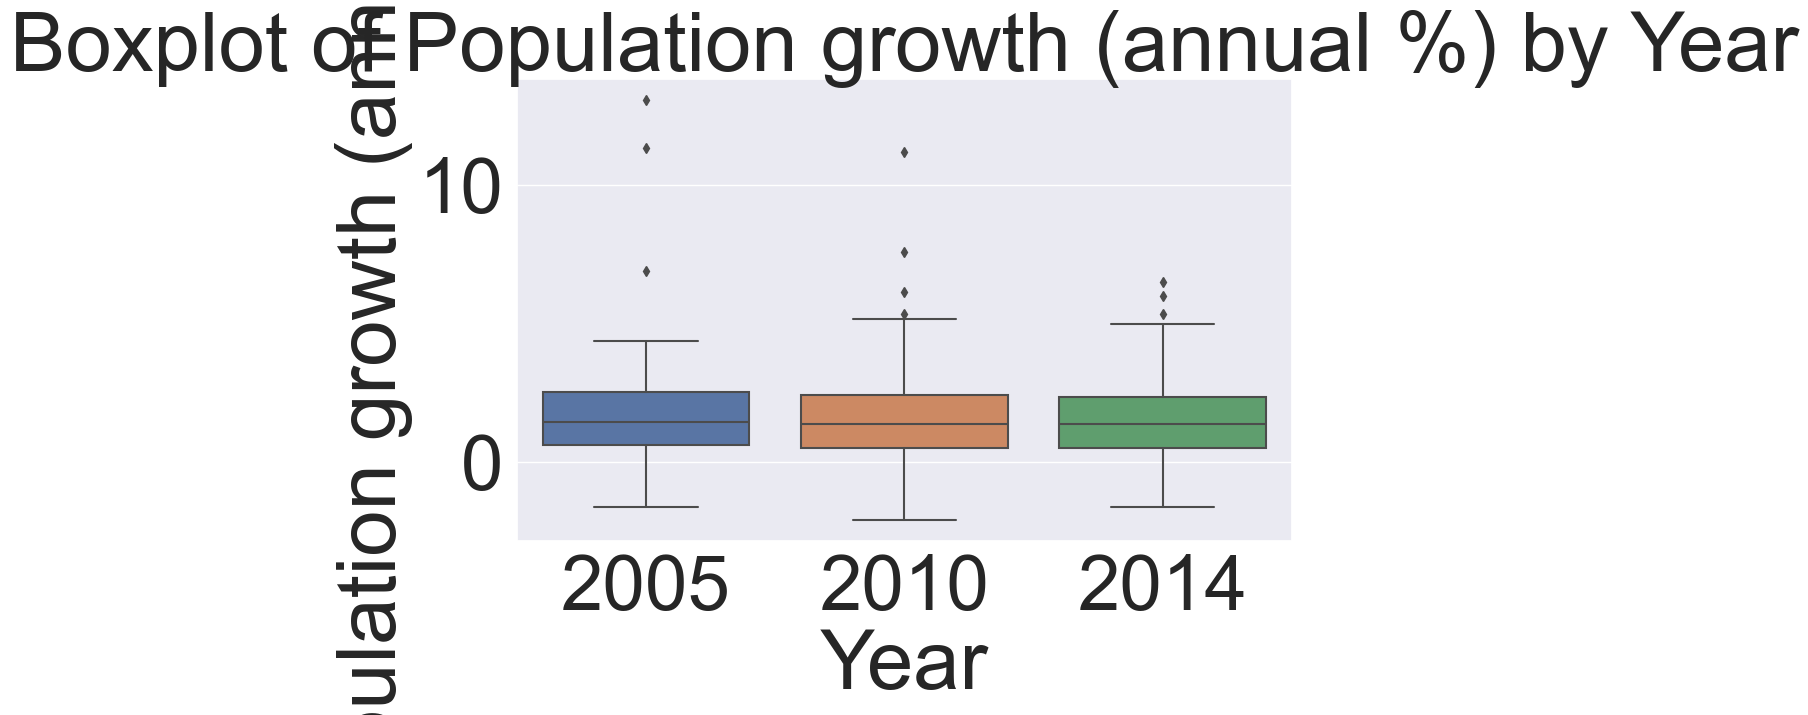

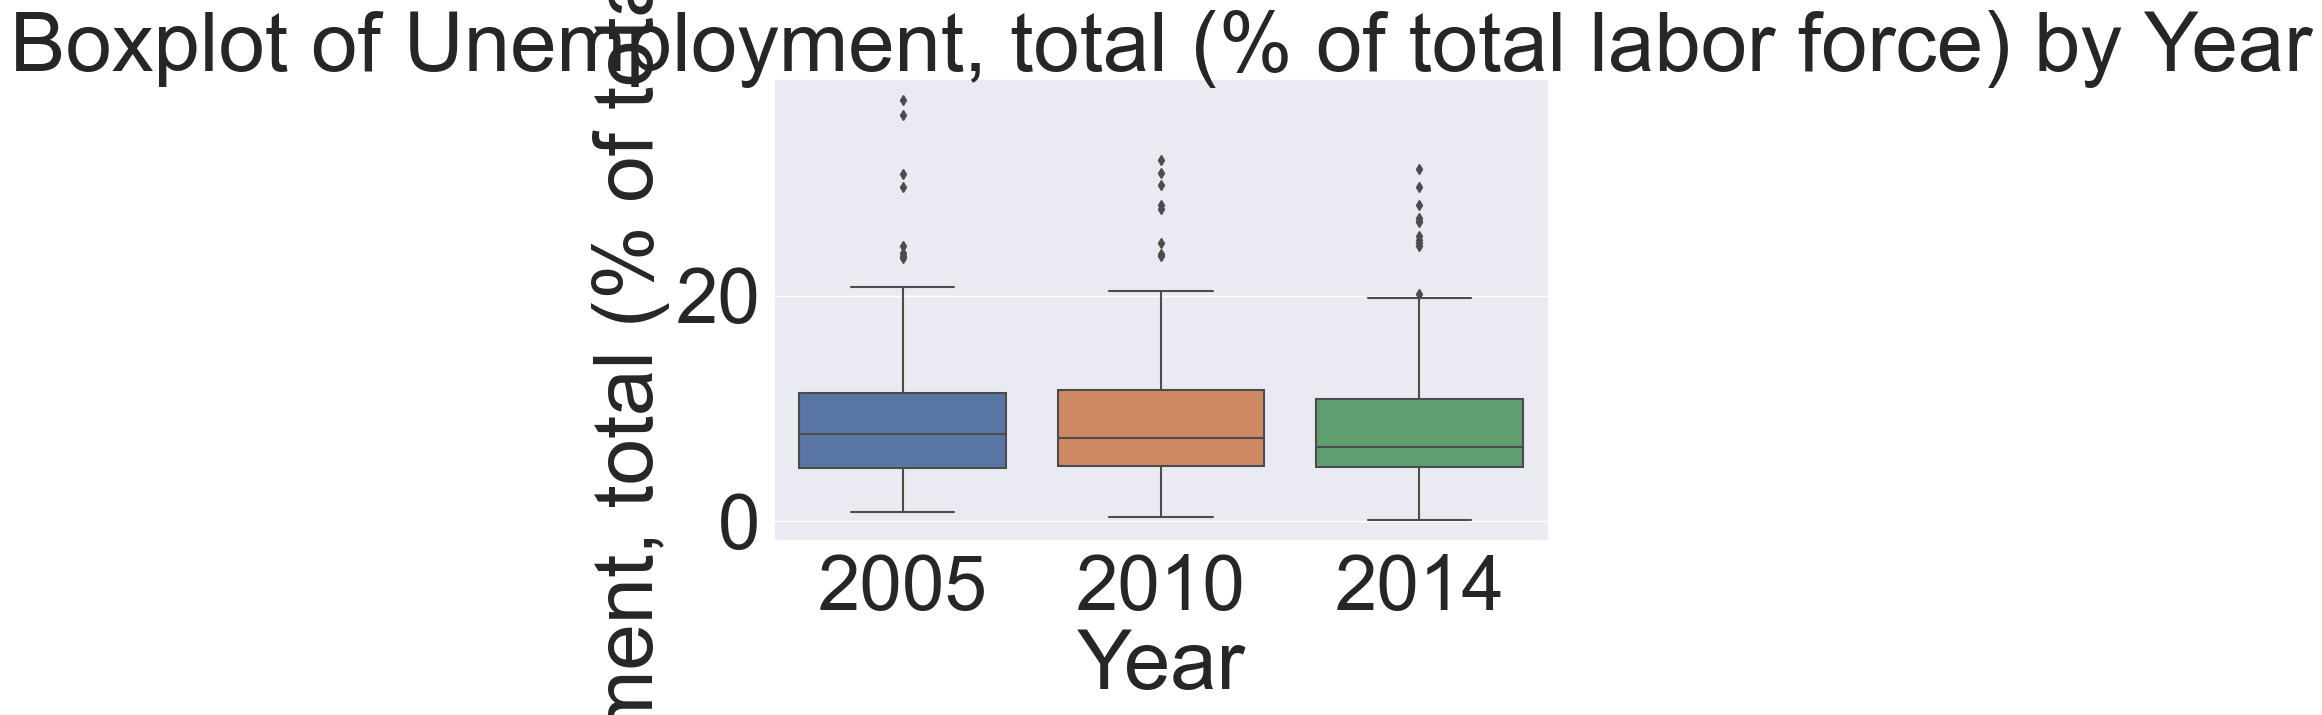

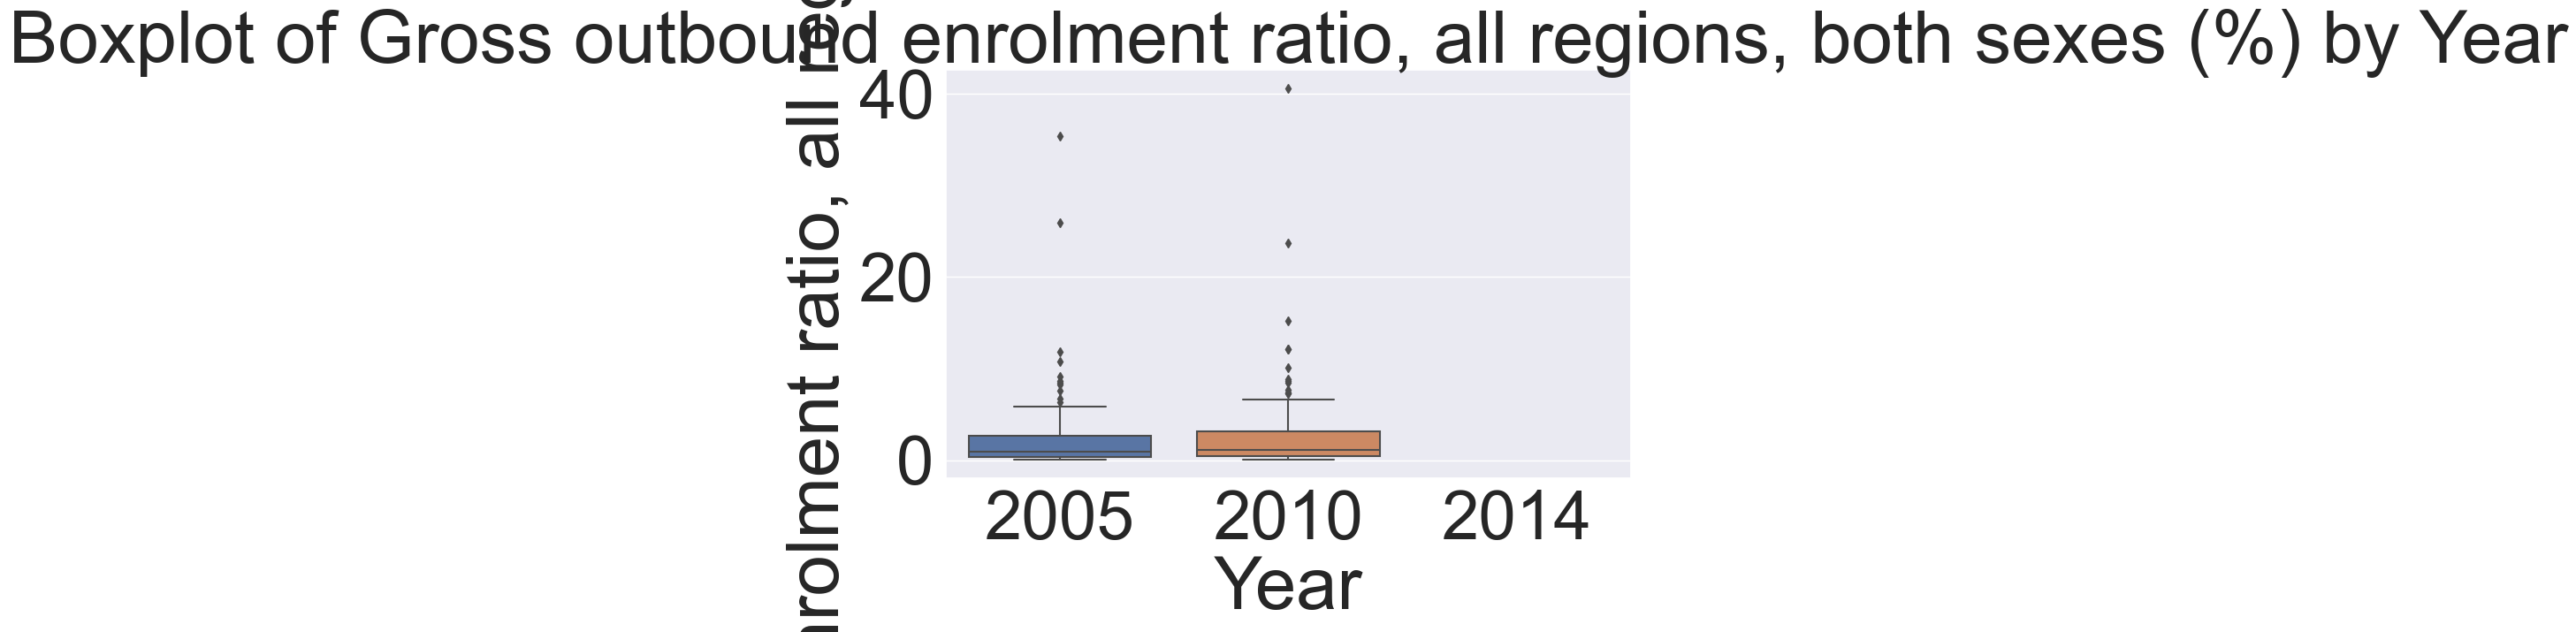

In [303]:
mask = echantillon_pivoted['Year'] == '2005'
for indicator in list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Year', y=indicator, data=echantillon_pivoted)
    plt.title('Boxplot of ' + indicator + ' by Year')
    plt.show()

    



